# T5 Model Definition

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

t5_model_size_dict = {
    "fp32_memory_consumption_MiB": [],
    "parameter_count_M": [], 
    "layers": [],  # total layer count
    "d_model": [], # embedding size
    "d_ff": [],    # feedforward output size
    "d_kv": [],    # inner attention k/v matrix size
    "attention_heads": [], # attention head count
    "model_name": [],
    "seq_len": []
}

def add_model_size(memory, params, name, layers, d_model, d_ff, d_kv, heads, seq_len):
    t5_model_size_dict["fp32_memory_consumption_MiB"].append(memory)
    t5_model_size_dict["parameter_count_M"].append(params)
    t5_model_size_dict["model_name"].append(name)
    t5_model_size_dict["layers"].append(layers)
    t5_model_size_dict["d_model"].append(d_model)
    t5_model_size_dict["d_ff"].append(d_ff)
    t5_model_size_dict["d_kv"].append(d_kv)
    t5_model_size_dict["attention_heads"].append(heads)
    t5_model_size_dict["seq_len"].append(seq_len)


add_model_size(name="t5-small", memory=607,   params=60.51,  layers=6,  d_model=512,  d_ff=2048,  d_kv=64,  heads=8,  seq_len=512)
add_model_size(name="t5-base",  memory=1307,  params=222.9,  layers=12, d_model=768,  d_ff=3072,  d_kv=64,  heads=12, seq_len=512)
add_model_size(name="t5-large", memory=3185,  params=737.67, layers=24, d_model=1024, d_ff=4096,  d_kv=64,  heads=16, seq_len=512)
add_model_size(name="t5-3b",    memory=11249, params=2851.6, layers=24, d_model=1024, d_ff=16384, d_kv=128, heads=32, seq_len=512)

# wait on A100 to profile this
#add_model_size(name = "t5-11b", memory = , params = 11B, layers=24, d_model=1024, d_ff=65536, d_kv=128, heads=128)

t5_model_size_df = pd.DataFrame(t5_model_size_dict)
t5_model_size_df

,fp32_memory_consumption_MiB,parameter_count_M,layers,d_model,d_ff,d_kv,attention_heads,model_name,seq_len
0,607,60.51,6,512,2048,64,8,t5-small,512
1,1307,222.90,12,768,3072,64,12,t5-base,512
2,3185,737.67,24,1024,4096,64,16,t5-large,512
3,11249,2851.60,24,1024,16384,128,32,t5-3b,512


<Axes: xlabel='parameter_count_M', ylabel='fp32_memory_consumption_MiB'>

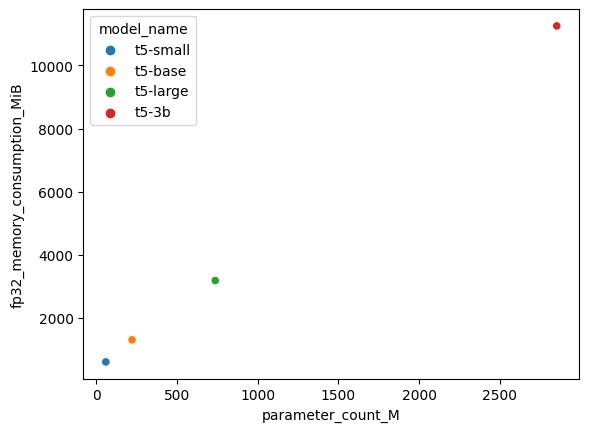

In [3]:
sns.scatterplot(
    data=t5_model_size_df,
    x="parameter_count_M",
    y="fp32_memory_consumption_MiB",
    hue="model_name",
)

In [95]:
gpu_arch_dict = {
    "gpu_name": [],
    "arch": [],
    "fp16_tflops": [],
    "memory_bw_gbs": [],
    "memory_gb": [],
}

def add_gpu(name, arch, fp16, memory_bw_gbs, memory_gb):
    gpu_arch_dict["gpu_name"].append(name)
    gpu_arch_dict["arch"].append(arch)
    gpu_arch_dict["fp16_tflops"].append(fp16)
    gpu_arch_dict["memory_bw_gbs"].append(memory_bw_gbs)
    gpu_arch_dict["memory_gb"].append(memory_gb)


# https://www.techpowerup.com/gpu-specs/tesla-t4.c3316
add_gpu(name="T4", arch="Turing", fp16=65, memory_bw_gbs=320, memory_gb=16)

# https://images.nvidia.com/content/technologies/volta/pdf/volta-v100-datasheet-update-us-1165301-r5.pdf
add_gpu(name="V100 SXM2", arch="Volta", fp16=130, memory_bw_gbs=900, memory_gb=32)
add_gpu(name="V100 PCIe", arch="Volta", fp16=130, memory_bw_gbs=900, memory_gb=32)
add_gpu(name="V100S PCIe", arch="Volta", fp16=130, memory_bw_gbs=1134, memory_gb=32)

# https://developer.nvidia.com/blog/nvidia-ampere-architecture-in-depth/
# using the peak tensorcore value as the palm paper did (https://arxiv.org/pdf/2204.02311.pdf)
add_gpu(name="A100 40G SXM4", arch="Ampere", fp16=312, memory_bw_gbs=1555, memory_gb=40)

add_gpu(name="A100 80G SXM4", arch="Ampere", fp16=312, memory_bw_gbs=1935, memory_gb=80)
add_gpu(name="A100 80G PCIe", arch="Ampere", fp16=312, memory_bw_gbs=2039, memory_gb=80)

# https://www.nvidia.com/en-us/data-center/h100/
add_gpu(name="H100 PCIe", arch="Hopper", fp16=1513, memory_bw_gbs=2000, memory_gb=80)
add_gpu(name="H100 SXM", arch="Hopper", fp16=1979, memory_bw_gbs=3350, memory_gb=80)
add_gpu(name="H100 NVL", arch="Hopper", fp16=3958, memory_bw_gbs=7800, memory_gb=80)

gpu_arch_df = pd.DataFrame(gpu_arch_dict)
gpu_arch_df

,gpu_name,arch,fp16_tflops,memory_bw_gbs,memory_gb
0,T4,Turing,65,320,16
1,V100 SXM2,Volta,130,900,32
2,V100 PCIe,Volta,130,900,32
3,V100S PCIe,Volta,130,1134,32
4,A100 40G SXM4,Ampere,312,1555,40
5,A100 80G SXM4,Ampere,312,1935,80
6,A100 80G PCIe,Ampere,312,2039,80
7,H100 PCIe,Hopper,1513,2000,80
8,H100 SXM,Hopper,1979,3350,80
9,H100 NVL,Hopper,3958,7800,80


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'T4'),
  Text(1, 0, 'V100 SXM2'),
  Text(2, 0, 'V100 PCIe'),
  Text(3, 0, 'V100S PCIe'),
  Text(4, 0, 'A100 40G SXM4'),
  Text(5, 0, 'A100 80G SXM4'),
  Text(6, 0, 'A100 80G PCIe'),
  Text(7, 0, 'H100 PCIe'),
  Text(8, 0, 'H100 SXM'),
  Text(9, 0, 'H100 NVL')])

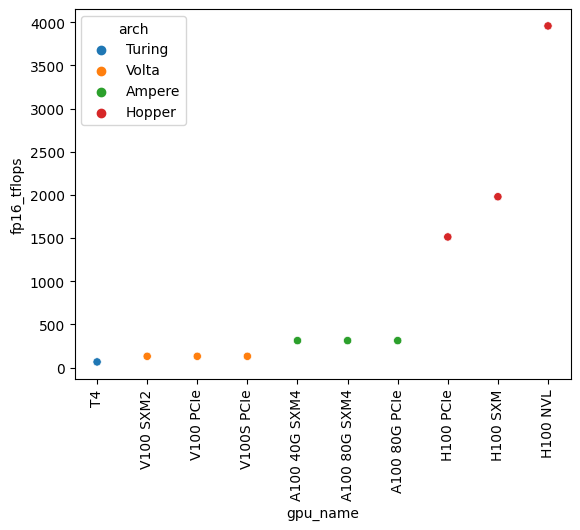

In [20]:
sns.scatterplot(
    data=gpu_arch_df,
    x="gpu_name",
    y="fp16_tflops",
    hue="arch",
)
plt.xticks(rotation=90)

## Model FLOPs Utilization (MFU)

In [96]:
def get_model_flops(
    model_param_count,
    layers_count,
    heads_count,
    head_dim,
    seq_len):
    
    N = model_param_count
    L = layers_count
    H = heads_count
    Q = head_dim
    T = seq_len
    
    ff_flops = 2 * N
    bw_flops = 4 * N
    attention_flops = 12 * L * H * Q * T
    
    model_flops = ff_flops + bw_flops + attention_flops
    
    print(f"FF FLOPs: {round(ff_flops / 1e6,1)}M, {round(ff_flops/model_flops * 100, 2)}%")
    print(f"BW FLOPs: {round(bw_flops / 1e6,1)}M, {round(bw_flops/model_flops * 100, 2)}%")
    print(f"AT FLOPs: {round(attention_flops / 1e6,1)}M, {round(attention_flops/model_flops * 100, 2)}%")
    return model_flops

def get_peak_throughput(
    model_throughput_tk_per_sec,
    model_name,
    gpu_name,
    gpu_count):
    
    gpu_row_df = gpu_arch_df.query(f"gpu_name=='{gpu_name}'")
    model_row_df = t5_model_size_df.query(f"model_name=='{model_name}'")
    
    model_flops = get_model_flops(
        model_param_count=model_row_df["parameter_count_M"].values[0] * 1e6,
        layers_count=model_row_df["layers"].values[0],
        heads_count=model_row_df["attention_heads"].values[0],
        head_dim=model_row_df["d_model"].values[0],
        seq_len=model_row_df["seq_len"].values[0]
    )
    
    peak_tflops = gpu_row_df["fp16_tflops"].values[0] * gpu_count
    peak_flops = peak_tflops  * 1000**4
    peak_tokens_per_sec = peak_flops / model_flops
    
    print(f"Model {model_name}:        {int(model_flops):>{20}} FLOPs")
    print(f"GPU {gpu_name} x {gpu_count}: {peak_flops:>{20}} FLOPs")
    print(f"-> theoretical peak tokens/s: {int(peak_tokens_per_sec)}")
    print(f"-> actual           tokens/s: {int(model_throughput_tk_per_sec)}")
    mfu = round((model_throughput_tk_per_sec / peak_tokens_per_sec) * 100, 2)
    print(f"MFU: {mfu}%")
    
get_peak_throughput(
    model_throughput_tk_per_sec=13000,
    gpu_name="A100 40G SXM4",
    gpu_count=2,
    model_name="t5-small"
)

FF FLOPs: 121.0M, 23.54%
BW FLOPs: 242.0M, 47.08%
AT FLOPs: 151.0M, 29.37%
Model t5-small:                   514054944 FLOPs
GPU A100 40G SXM4 x 2:      624000000000000 FLOPs
-> theoretical peak tokens/s: 1213878
-> actual           tokens/s: 13000
MFU: 1.07%


### T5-3B Architecture

```
T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (1-23): 23 x T5Block(                                                                                                            [70/134]
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (final_layer_norm): T5LayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (decoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerCrossAttention(
            (EncDecAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (2): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (1-23): 23 x T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerCrossAttention(
            (EncDecAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (2): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (final_layer_norm): T5LayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (lm_head): Linear(in_features=1024, out_features=32128, bias=False)
)
```